In [181]:
import  pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.model_selection import train_test_split
from  sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score,cross_val_predict
import numpy as np
from sklearn.neighbors import KNeighborsRegressor



In [182]:
car_data = pd.read_csv('Car details v5.csv')
# Assuming 'car_data' is your DataFrame
car_data = car_data[car_data['owner'] != 'Test Drive Car']
# car_data = car_data[car_data['fuel'] != 'Electric']
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [183]:
print(car_data['fuel'].value_counts())
print(car_data['seller_type'].value_counts())
print(car_data['owner'].value_counts())
print(car_data['transmission'].value_counts())

fuel
Diesel    4401
Petrol    3627
CNG         57
LPG         38
Name: count, dtype: int64
seller_type
Individual          6766
Dealer              1121
Trustmark Dealer     236
Name: count, dtype: int64
owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Name: count, dtype: int64
transmission
Manual       7077
Automatic    1046
Name: count, dtype: int64


In [184]:
Age = []
for i in car_data['year']:
    Age.append(2023-i)
car_data.insert(2, 'Age', Age)


from sklearn import preprocessing

# Creating a dictionary to store value counts of categorical variables
data = {
    'fuel': car_data['fuel'].value_counts(),
    'seller_type': car_data['seller_type'].value_counts(),
    'Transmission': car_data['transmission'].value_counts(),
    'owner': car_data['owner'].value_counts()
}

# Initializing LabelEncoder
le = preprocessing.LabelEncoder()

# List of categorical attributes
categorical_attr = ['fuel', 'seller_type', 'transmission', 'owner']

# Applying LabelEncoder to categorical attributes
car_data[categorical_attr] = car_data[categorical_attr].apply(le.fit_transform, axis=0)

# Adding 2 to each encoded value and creating new columns
car_data['Fuel_Type_n'] = car_data['fuel'] + 1
car_data['Seller_Type_n'] = car_data['seller_type'] + 1
car_data['Transmission_n'] = car_data['transmission'] + 1
car_data['Owner_n'] = car_data['owner'] + 1

# Dropping the original categorical columns
car_data.drop(columns=['fuel', 'seller_type', 'transmission', 'owner'], inplace=True)

# Displaying the modified dataset
print(car_data)


                              name  year  Age  selling_price  km_driven  \
0           Maruti Swift Dzire VDI  2014    9         450000     145500   
1     Skoda Rapid 1.5 TDI Ambition  2014    9         370000     120000   
2         Honda City 2017-2020 EXi  2006   17         158000     140000   
3        Hyundai i20 Sportz Diesel  2010   13         225000     127000   
4           Maruti Swift VXI BSIII  2007   16         130000     120000   
...                            ...   ...  ...            ...        ...   
8123             Hyundai i20 Magna  2013   10         320000     110000   
8124         Hyundai Verna CRDi SX  2007   16         135000     119000   
8125        Maruti Swift Dzire ZDi  2009   14         382000     120000   
8126               Tata Indigo CR4  2013   10         290000      25000   
8127               Tata Indigo CR4  2013   10         290000      25000   

         mileage   engine   max_power  seats  Fuel_Type_n  Seller_Type_n  \
0      23.4 kmpl  1248 

In [185]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8123 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            8123 non-null   object 
 1   year            8123 non-null   int64  
 2   Age             8123 non-null   int64  
 3   selling_price   8123 non-null   int64  
 4   km_driven       8123 non-null   int64  
 5   mileage         7902 non-null   object 
 6   engine          7902 non-null   object 
 7   max_power       7908 non-null   object 
 8   seats           7902 non-null   float64
 9   Fuel_Type_n     8123 non-null   int32  
 10  Seller_Type_n   8123 non-null   int32  
 11  Transmission_n  8123 non-null   int32  
 12  Owner_n         8123 non-null   int32  
dtypes: float64(1), int32(4), int64(4), object(4)
memory usage: 761.5+ KB


In [186]:
# Assuming 'car_data' is your DataFrame
car_data=car_data.dropna()


In [187]:
import pandas as pd
from scipy import stats

#Converting the Year Columns

car_data.drop(columns=['name', 'year'],inplace=True)
# Remove outliers using Z-score
z_scores = stats.zscore(car_data[['selling_price', 'km_driven', 'Age']])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
car_data = car_data[filtered_entries]

# Displaying the first few rows of the updated dataset without outliers
print(car_data.head())


   Age  selling_price  km_driven     mileage   engine   max_power  seats  \
0    9         450000     145500   23.4 kmpl  1248 CC      74 bhp    5.0   
1    9         370000     120000  21.14 kmpl  1498 CC  103.52 bhp    5.0   
2   17         158000     140000   17.7 kmpl  1497 CC      78 bhp    5.0   
3   13         225000     127000   23.0 kmpl  1396 CC      90 bhp    5.0   
4   16         130000     120000   16.1 kmpl  1298 CC    88.2 bhp    5.0   

   Fuel_Type_n  Seller_Type_n  Transmission_n  Owner_n  
0            2              2               2        1  
1            2              2               2        3  
2            4              2               2        4  
3            2              2               2        1  
4            4              2               2        1  


In [188]:
car_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7530 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             7530 non-null   int64  
 1   selling_price   7530 non-null   int64  
 2   km_driven       7530 non-null   int64  
 3   mileage         7530 non-null   object 
 4   engine          7530 non-null   object 
 5   max_power       7530 non-null   object 
 6   seats           7530 non-null   float64
 7   Fuel_Type_n     7530 non-null   int32  
 8   Seller_Type_n   7530 non-null   int32  
 9   Transmission_n  7530 non-null   int32  
 10  Owner_n         7530 non-null   int32  
dtypes: float64(1), int32(4), int64(3), object(3)
memory usage: 588.3+ KB


In [201]:
# Assuming 'car_data' is your DataFrame
car_data['mileage'] = pd.to_numeric(car_data['mileage'].replace(r'[^\d]', '', regex=True), errors='coerce')
car_data['engine'] = pd.to_numeric(car_data['engine'].replace(r'[^\d]', '', regex=True), errors='coerce')
car_data['max_power'] = pd.to_numeric(car_data['max_power'].replace(r'[^\d]', '', regex=True), errors='coerce')

# Displaying the first few rows
car_data.head()


,Age,selling_price,km_driven,mileage,engine,max_power,seats,Fuel_Type_n,Seller_Type_n,Transmission_n,Owner_n
0,9,450000,145500,234,1248,74,5.0,2,2,2,1
1,9,370000,120000,2114,1498,10352,5.0,2,2,2,3
2,17,158000,140000,177,1497,78,5.0,4,2,2,4
3,13,225000,127000,230,1396,90,5.0,2,2,2,1
4,16,130000,120000,161,1298,882,5.0,4,2,2,1


In [190]:
x=car_data.drop(['selling_price'],axis=1)
y = car_data['selling_price']

In [191]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.2)


In [192]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)




In [193]:
car_data.isnull().sum()

Age               0
selling_price     0
km_driven         0
mileage           0
engine            0
max_power         0
seats             0
Fuel_Type_n       0
Seller_Type_n     0
Transmission_n    0
Owner_n           0
dtype: int64

In [194]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')

R-squared: 0.8042139126107423


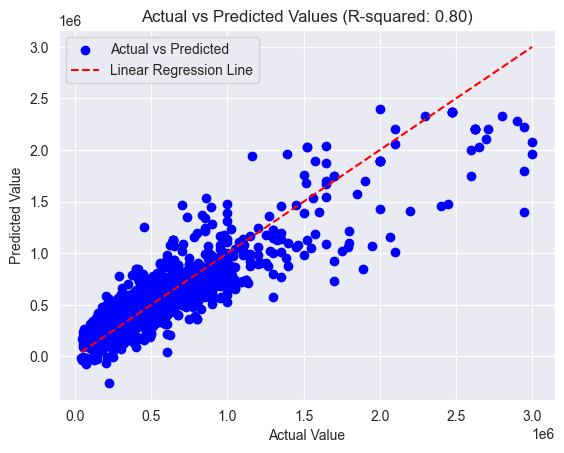

In [195]:
# Scatter plot with different colors for actual and predicted values
plt.scatter(y_test, y_pred, c='blue', label='Actual vs Predicted')

# Linear regression line
line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(line, line, color='red', linestyle='--', label='Linear Regression Line')

plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title(f'Actual vs Predicted Values (R-squared: {r2:.2f})')
plt.legend()
plt.show()

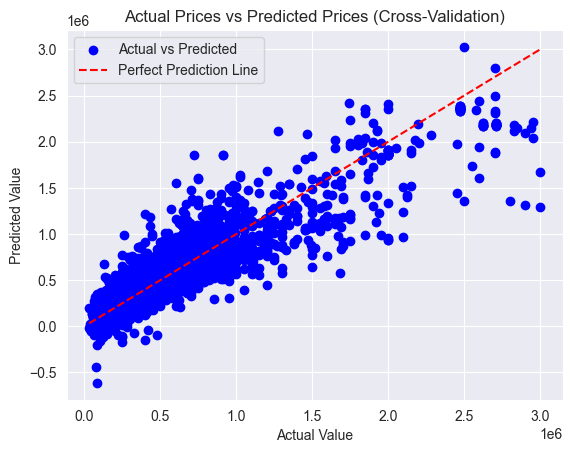

Cross-validated R squared scores: [0.80658055 0.81227765 0.80373727 0.77839306 0.81374362]
R squared score: 0.8029464279861955


In [202]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Assuming X_train, y_train, and model are already defined

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
predicted = cross_val_predict(model, X_train, y_train, cv=kfold)

# Scatter plot with different colors for actual and predicted values
plt.scatter(y_train, predicted, c='blue', label='Actual vs Predicted')

# Line of perfect prediction (identity line)
line = np.linspace(min(y_train), max(y_train), 100)
plt.plot(line, line, color='red', linestyle='--', label='Perfect Prediction Line')

plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual Prices vs Predicted Prices (Cross-Validation)')
plt.legend()
plt.show()

# Evaluate cross-validated R squared scores
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
print("Cross-validated R squared scores:", results)
print("R squared score:", np.mean(results))


In [197]:
regressor=KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [198]:
y_pred=regressor.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_test is the actual target values for your test set
# If you have a regression problem, you might use metrics like Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'R-squared: {r2}')

R-squared: 0.7990289782071704


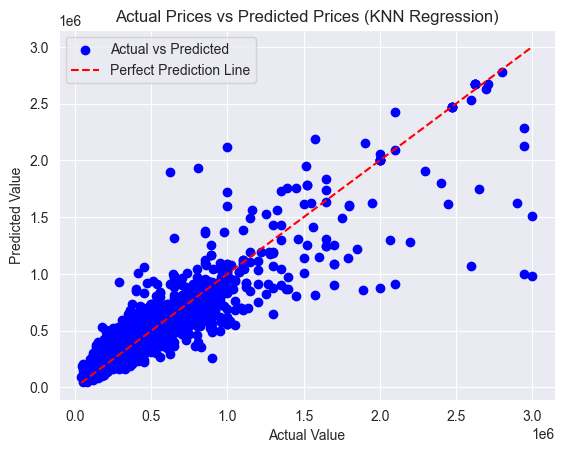

In [199]:
plt.scatter(y_test, y_pred, c='blue', label='Actual vs Predicted')
line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(line, line, color='red', linestyle='--', label='Perfect Prediction Line')

plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual Prices vs Predicted Prices (KNN Regression)')
plt.legend()
plt.show()

Loss curve for linear

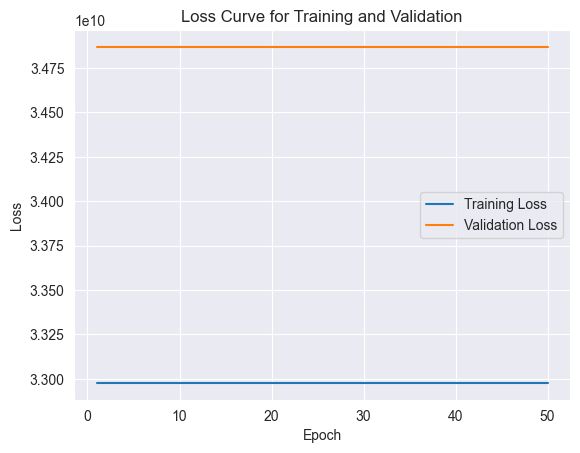

In [200]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

train_loss_values = []
val_loss_values = []
num_epochs = 50  # You can adjust the number of epochs
for epoch in range(num_epochs):
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Calculate training loss
    y_train_pred = model.predict(X_train)
    train_loss = mean_squared_error(y_train, y_train_pred)
    train_loss_values.append(train_loss)

    # Calculate validation loss
    y_val_pred = model.predict(X_val)
    val_loss = mean_squared_error(y_val, y_val_pred)
    val_loss_values.append(val_loss)

plt.plot(range(1, num_epochs + 1), train_loss_values, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_loss_values, label='Validation Loss')
plt.title('Loss Curve for Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Loss curve for KNN regressor

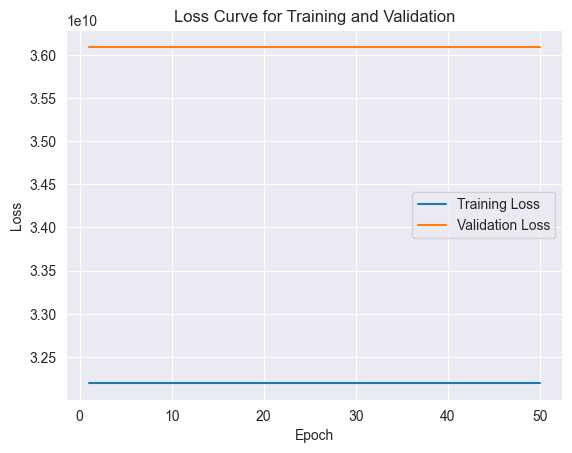

In [203]:
from sklearn.metrics import mean_squared_error
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

train_loss_values = []
val_loss_values = []
num_epochs = 50  # You can adjust the number of epochs
for epoch in range(num_epochs):
    # Fit the model to the training data
    regressor.fit(X_train, y_train)

    # Calculate training loss
    y_train_pred = model.predict(X_train)
    train_loss = mean_squared_error(y_train, y_train_pred)
    train_loss_values.append(train_loss)

    # Calculate validation loss
    y_val_pred = model.predict(X_val)
    val_loss = mean_squared_error(y_val, y_val_pred)
    val_loss_values.append(val_loss)

plt.plot(range(1, num_epochs + 1), train_loss_values, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_loss_values, label='Validation Loss')
plt.title('Loss Curve for Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()